In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cp '/content/gdrive/MyDrive/EmotionRecognition/EMOdb.zip' '/content/EMOdb.zip'

In [ ]:
! unzip 'EMOdb.zip'

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Audio
import sklearn.metrics

paths = [os.path.join(d, x)
            for d, dirs, files in os.walk('EMOdb')
            for x in files if x.endswith(".wav")]

paths.sort()

print(paths)

['EMOdb/1 Zmogus/1 Baime/1 Baime _07.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _15.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _17.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _23.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _27.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _49.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _51.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _68.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _90.wav', 'EMOdb/1 Zmogus/1 Baime/1 Baime _93.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_11.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_33.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_42.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_48.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_55.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_56.wav', 'EMOdb/1 Zmogus/1 Dziaugsmas/1 Dziaugsmas_93.wav', 'EMOdb/1 Zmogus/1 Liudesys/1 Liudesys_01.wav', 'EMOdb/1 Zmogus/1 Liudesys/1 Liudesys_02.wav', 'EMOdb/1 Zmogus/1 Liudesys/1 Liudesys_03.wav', 'EMOdb/1 Zmogus/1 Liudesys/1 Liudesys_04.wav', 'EMOdb/1 Zmogus/1 Liudesys/1 Liude

In [ ]:
class_names = ['Baime', 'Dziaugsmas', 'Liudesys', 'Neutrali', 'Nuostaba', 'Pasislykstejimas', 'Pyktis']
labels_names = [path.split('/')[2].split(' ')[1] for path in paths]
labels = [class_names.index(label_name) for label_name in labels_names]

print (labels_names)
print (labels)

['Baime', 'Baime', 'Baime', 'Baime', 'Baime', 'Baime', 'Baime', 'Baime', 'Baime', 'Baime', 'Dziaugsmas', 'Dziaugsmas', 'Dziaugsmas', 'Dziaugsmas', 'Dziaugsmas', 'Dziaugsmas', 'Dziaugsmas', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudesys', 'Liudes

In [ ]:
Data = []
iterations = 0

for path in paths:
  audio_data, sampling_rate = librosa.load(path)
  spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate, n_mels=128,fmax=8000) 
  spectrogram = librosa.power_to_db(spectrogram)

  # Normalize to [0, 1]
  img = spectrogram
  img = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())

  # Convert to RGB image
  cmap = plt.get_cmap('viridis')
  rgba_img = cmap(img)
  rgb_img = np.delete(rgba_img, 3, 2)

  # Convert pixel values to range of [0, 255]
  rgb_img *= 255
  rgb_img = rgb_img.astype(np.uint8)

  # Resize image
  pil_img = Image.fromarray(rgb_img)
  resized_img = pil_img.resize((224,224))
  resized_img_array = np.asarray(resized_img)

  Data.append(resized_img_array)

  # Logging

  if (iterations % 100 == 0):
    print(iterations, ' | ', len(Data))
  
  iterations += 1
  if (iterations >= 1500):
      break;

print(len(Data))

0  |  1
100  |  101
200  |  201
300  |  301
400  |  401
500  |  501
600  |  601
700  |  701
800  |  801
900  |  901
1000  |  1001
1100  |  1101
1200  |  1201
1300  |  1301
1400  |  1401
1453


In [ ]:
X = np.array(Data)
X.shape

(1453, 224, 224, 3)

In [ ]:
Y = np.array(labels)
Y.shape

(1453,)

In [ ]:
N=X.shape[0]
p=np.random.permutation(N)

X=X[p]
Y=Y[p]  #sumaisymas

x_train=X[:int(0.7*N)]
y_train=Y[:int(0.7*N)]

x_val=X[int(0.7*N):]
y_val=Y[int(0.7*N):]

In [ ]:
import tensorflow as tf
import keras
import sklearn as sk
from sklearn.metrics import confusion_matrix

In [ ]:
input = tf.keras.Input(shape=(224,224,3))
x = tf.keras.applications.convnext.ConvNeXtTiny(include_top=False)(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(7,activation='softmax')(x)
model = tf.keras.Model(inputs=input,outputs=x)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=1e-9,verbose=1)
]

111650432/111650432 [==============================] - 6s 0us/step


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])

In [ ]:
cnnhistory = model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=callbacks,batch_size=32,shuffle=True,epochs=100)

Epoch 1/100
32/32 [==============================] - 111s 1s/step - loss: 1.9747 - acc: 0.2153 - val_loss: 1.8106 - val_acc: 0.2982 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 27s 860ms/step - loss: 1.7105 - acc: 0.3412 - val_loss: 1.5826 - val_acc: 0.4427 - lr: 0.0010
Epoch 3/100
32/32 [==============================] - 28s 871ms/step - loss: 1.6657 - acc: 0.3776 - val_loss: 1.4705 - val_acc: 0.4633 - lr: 0.0010
Epoch 4/100
32/32 [==============================] - 28s 875ms/step - loss: 1.4284 - acc: 0.4484 - val_loss: 1.6089 - val_acc: 0.3876 - lr: 0.0010
Epoch 5/100
32/32 [==============================] - 28s 876ms/step - loss: 1.2644 - acc: 0.5428 - val_loss: 1.2668 - val_acc: 0.5206 - lr: 0.0010
Epoch 6/100
32/32 [==============================] - 28s 875ms/step - loss: 1.1402 - acc: 0.5742 - val_loss: 1.2426 - val_acc: 0.5734 - lr: 0.0010
Epoch 7/100
32/32 [==============================] - 28s 877ms/step - loss: 0.8334 - acc: 0.6853 - val_loss: 1.0510 - va

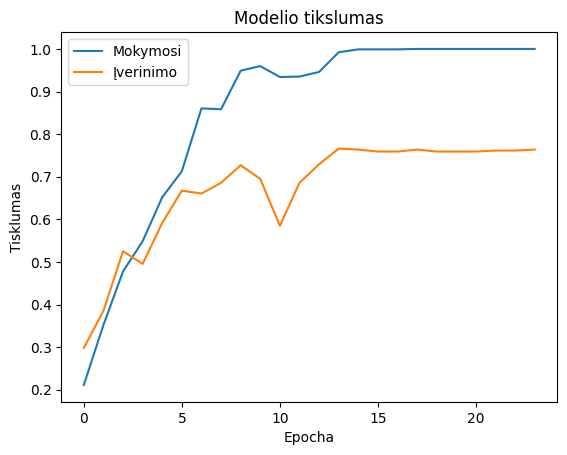

In [ ]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('Modelio tikslumas')
plt.ylabel('Tisklumas')
plt.xlabel('Epocha')
plt.legend(['Mokymosi', 'Įverinimo'], loc='upper left')
plt.show()

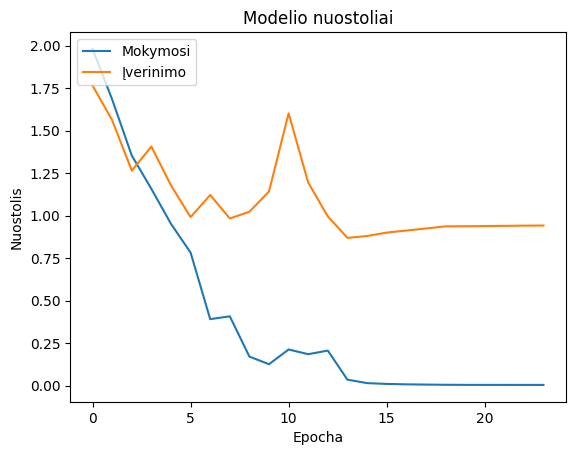

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Modelio nuostoliai')
plt.ylabel('Nuostolis')
plt.xlabel('Epocha')
plt.legend(['Mokymosi', 'Įverinimo'], loc='upper left')
plt.show()

In [ ]:
y_true = y_val
y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)

cm = sk.metrics.confusion_matrix(y_true, y_pred)
accuracy = sk.metrics.accuracy_score(y_true, y_pred)
precision = sk.metrics.precision_score(y_true, y_pred, average='weighted')
recall = sk.metrics.recall_score(y_true, y_pred, average='weighted')
f1 = sk.metrics.f1_score(y_true, y_pred, average='weighted')

14/14 [==============================] - 5s 226ms/step


In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.7660550458715596
Precision: 0.7737057188676758
Recall: 0.7660550458715596
F1: 0.7651526672350895


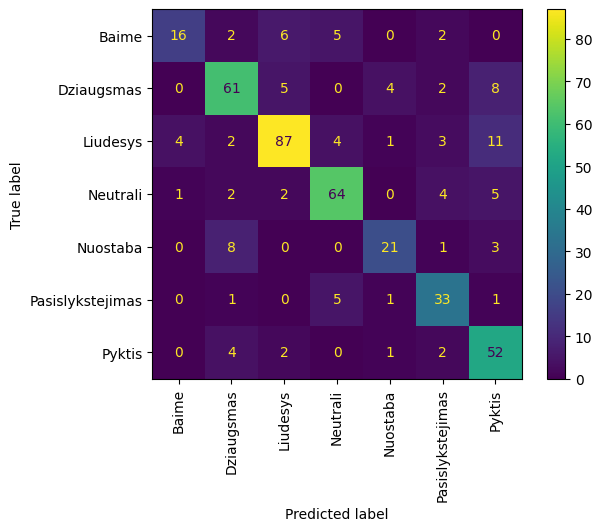

In [ ]:
cm_display = sk.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=class_names, xticks_rotation='vertical')